# Import Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [125]:
df = pd.read_csv("Student Mental health.csv")

In [126]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


# Exploratory Data Analysis (EDA)

In [127]:
def column_info(df):
    info = []
    for col in df.columns:
        data_type = df[col].dtype
        count = len(df[col])
        nan_count = df[col].isnull().sum()
        nan_percent = (nan_count / count) * 100 if count > 0 else 0
        unique_count = df[col].nunique()

        if pd.api.types.is_numeric_dtype(df[col]):
            max_value = df[col].max()
            min_value = df[col].min()
            sample_value = df[col].dropna().sample().iloc[0] if count - nan_count > 0 else None
        else:
            sample_value = df[col].dropna().sample().iloc[0] if count - nan_count > 0 else None
            max_value = 'no value'
            min_value = 'no value'

        info.append({
            'Column_name': col,
            'Data_Type': data_type,
            'Count': count,
            'NaN_Count': nan_count,
            'NaN_Percent': nan_percent,
            'Unique_Count': unique_count,
            'Max_Value': max_value,
            'Min_Value': min_value,
            'Sample_Value': sample_value
        })

    return pd.DataFrame(info)

In [128]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,NaN_Percent,Unique_Count,Max_Value,Min_Value,Sample_Value
0,Timestamp,object,101,0,0.000000,92,no value,no value,13/07/2020 10:12:28
1,Choose your gender,object,101,0,0.000000,2,no value,no value,Female
2,Age,float64,101,1,0.990099,7,24.0,18.0,24.0
3,What is your course?,object,101,0,0.000000,49,no value,no value,Engineering
4,Your current year of Study,object,101,0,0.000000,7,no value,no value,Year 3
5,What is your CGPA?,object,101,0,0.000000,6,no value,no value,2.50 - 2.99
6,Marital status,object,101,0,0.000000,2,no value,no value,No
7,Do you have Depression?,object,101,0,0.000000,2,no value,no value,No
8,Do you have Anxiety?,object,101,0,0.000000,2,no value,no value,No
9,Do you have Panic attack?,object,101,0,0.000000,2,no value,no value,Yes


In [129]:
df.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']

## Age

Age sütununda 1 NaN değer olduğunu görüyoruz. Bunu doldurmayı deneyelim.

In [130]:
df["Age"].value_counts()

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: count, dtype: int64

In [131]:
df["Age"].isnull().sum()

1

In [132]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])

In [133]:
df["Age"].isnull().sum()

0

In [134]:
fig = px.pie(df, names='Age', title='Age Distribution')
fig.update_layout(legend_title_text='Age')
fig.show()

## Gender

In [135]:
df["Gender"].value_counts()

Gender
Female    75
Male      26
Name: count, dtype: int64

In [136]:
fig = px.pie(df, names = "Gender", title = "Gender Distribution")
fig.update_layout(legend_title_text = "Gender")
fig.show()

## Year of Study

In [137]:
df["Year of Study"].value_counts()

Year of Study
year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: count, dtype: int64

her bir yıldan ikişer tane var. bunları düzenleyelim.

In [138]:
df["Year of Study"] = df["Year of Study"].replace(
    ["Year 1", "year 1", "Year 2", "year 2", "Year 3", "year 3", "year 4"], 
    [1, 1, 2, 2, 3, 3, 4])

In [139]:
df["Year of Study"].value_counts()

Year of Study
1    43
2    26
3    24
4     8
Name: count, dtype: int64

In [140]:
fig = px.pie(df, names = "Year of Study", title = "Year Distribution")
fig.update_layout(legend_title_text = "Years")
fig.show()

## CGPA

In [141]:
df["CGPA"].value_counts().sort_values()

CGPA
3.50 - 4.00      1
2.00 - 2.49      2
2.50 - 2.99      4
0 - 1.99         4
3.00 - 3.49     43
3.50 - 4.00     47
Name: count, dtype: int64

**burada "3.50 - 4.00" değerinden iki tane olduğunu görüyoruz.**

In [142]:
df["CGPA"].nunique()

6

In [143]:
df['CGPA'] = df['CGPA'].str.strip()

In [144]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [145]:
df["CGPA"].value_counts()

CGPA
3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: count, dtype: int64

In [146]:
data = {"CGPA_values": ["3.50 - 4.00", "3.00 - 3.49", "2.50 - 2.99", "0 - 1.99", "2.00 - 2.49"],
        "CGPA_counts": [48, 43, 4, 4, 2]}

fig = px.bar(data, x = "CGPA_values", y = "CGPA_counts", title = "CGPA Distribution")
fig.update_layout(legend_title_text = "CGPA")
fig.show()

## Marital Status

In [147]:
df["Marital status"].value_counts()

Marital status
No     85
Yes    16
Name: count, dtype: int64

In [148]:
plt = px.pie(df, names='Marital status', title='Marital Status Distribution')
plt.update_annotations(textposition='outside')
plt.update_layout(legend_title_text='Marital Status')
plt.show()

In [149]:
grouped = df.groupby("Gender")["Marital status"].value_counts()

df1 = pd.DataFrame(grouped)
df1

count
Gender Marital status       
Female No                 62
       Yes                13
Male   No                 23
       Yes                 3

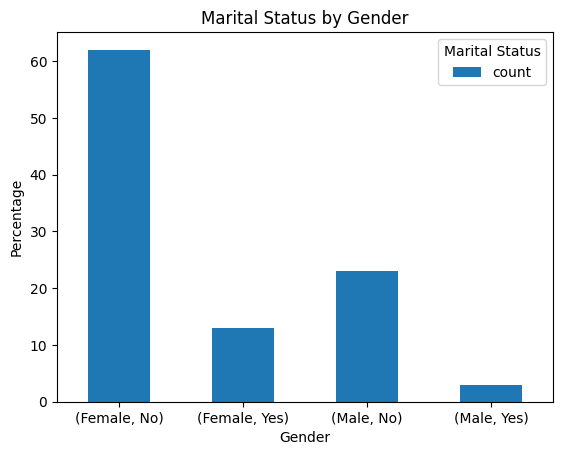

In [150]:
ax = grouped.plot(kind='bar')

ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Marital Status by Gender')
ax.legend(title='Marital Status')
ax.tick_params(rotation=0);

In [151]:
df2 = pd.concat([df['Gender'], df['Marital status']], axis=1).reset_index(drop=True)

In [152]:
df2.head()

,Gender,Marital status
0,Female,No
1,Male,No
2,Male,No
3,Female,Yes
4,Male,No


In [153]:
df2.columns

Index(['Gender', 'Marital status'], dtype='object')

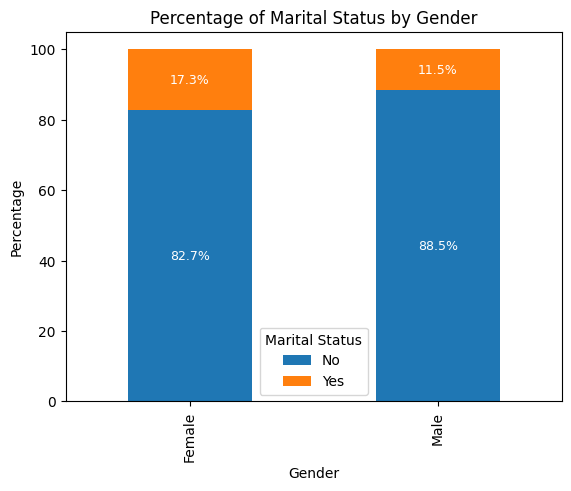

In [154]:
grouped = df2.groupby('Gender')['Marital status'].value_counts(normalize=True) * 100
grouped = grouped.unstack()

ax = grouped.plot(kind='bar', stacked=True)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Marital Status by Gender')
ax.legend(title='Marital Status')


plt.show()

## Course

In [155]:
df["Course"].value_counts()

Course
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Hum

In [156]:
df["Course"] = df["Course"].str.lower().str.strip()

In [157]:
df["Course"].nunique()

41

In [158]:
course_titles = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
}

In [159]:
df["Course"] = df["Course"].map(course_titles)

In [160]:
df["Course"].nunique()

37

In [161]:
df.groupby("Course")["Gender"].value_counts()

Course                   Gender
ALA                      Female     1
Accounting               Female     1
BCS                      Female    11
                         Male       7
BENL                     Female     3
BIT                      Female     6
                         Male       4
Banking Studies          Female     1
Biomedical Science       Male       2
                         Female     2
Biotechnology            Female     1
Business Administration  Female     1
CTS                      Female     1
Communication            Female     1
Diploma Nursing          Female     1
Diploma TESL             Female     1
ENM                      Female     1
Economics                Female     1
Engineering              Female    14
                         Male       5
Fiqh                     Female     1
Fiqh Fatwa               Female     1
Human Resources          Female     1
Human Sciences           Female     1
IRKHS                    Male       1
IT                

In [162]:
plt = px.histogram(df, x = "Course", title = "Course Distribution")
plt.show();

## Depression

In [163]:
df["Depression"].value_counts()

Depression
No     66
Yes    35
Name: count, dtype: int64

In [164]:
df.groupby("Depression")["Gender"].value_counts()

Depression  Gender
No          Female    46
            Male      20
Yes         Female    29
            Male       6
Name: count, dtype: int64

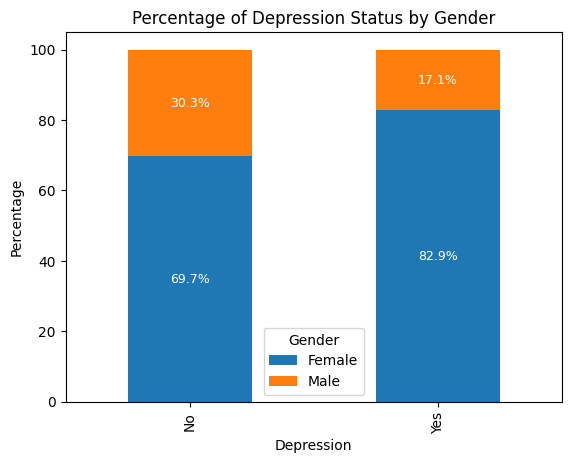

In [165]:
grouped = df.groupby("Depression")["Gender"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Depression")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Depression Status by Gender')
ax.legend(title="Gender")

print()

In [166]:
df.groupby("Depression")["CGPA"].value_counts()

Depression  CGPA       
No          3.50 - 4.00    35
            3.00 - 3.49    24
            0 - 1.99        4
            2.00 - 2.49     2
            2.50 - 2.99     1
Yes         3.00 - 3.49    19
            3.50 - 4.00    13
            2.50 - 2.99     3
Name: count, dtype: int64

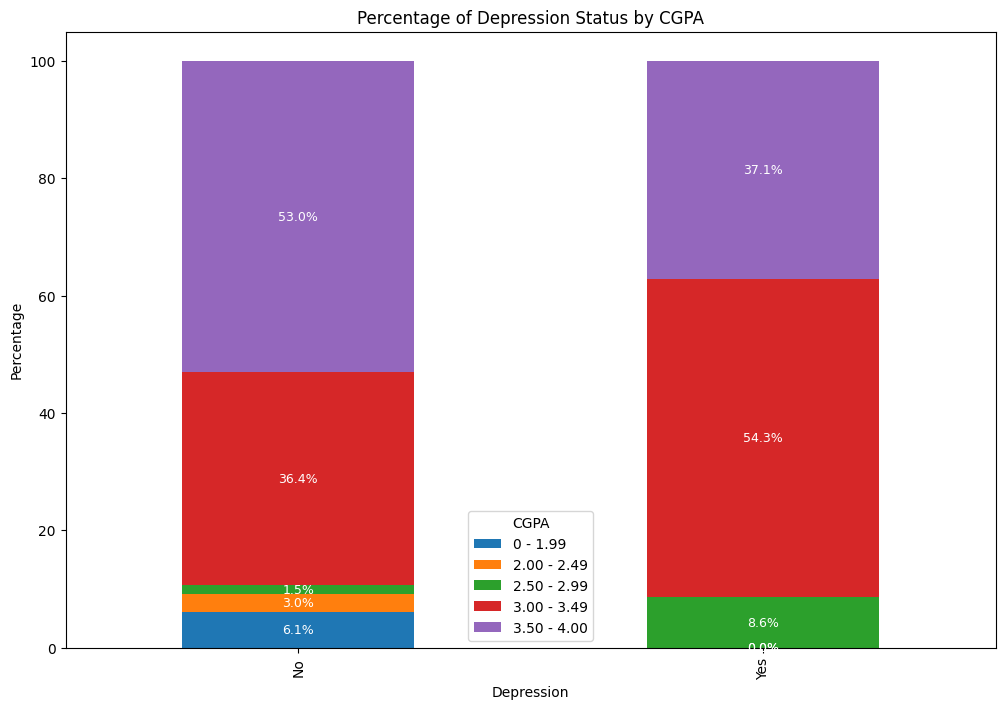

In [167]:
grouped = df.groupby("Depression")["CGPA"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True, figsize = (12, 8))


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Depression")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Depression Status by CGPA')
ax.legend(title="CGPA")

print()

## Anxiety

In [168]:
df["Anxiety"].value_counts()

Anxiety
No     67
Yes    34
Name: count, dtype: int64

In [169]:
fig = px.pie(df, names = "Anxiety", title = "Anxiety Distribution")
fig.update_layout(legend_title_text = "Anxiety", )
fig.show()

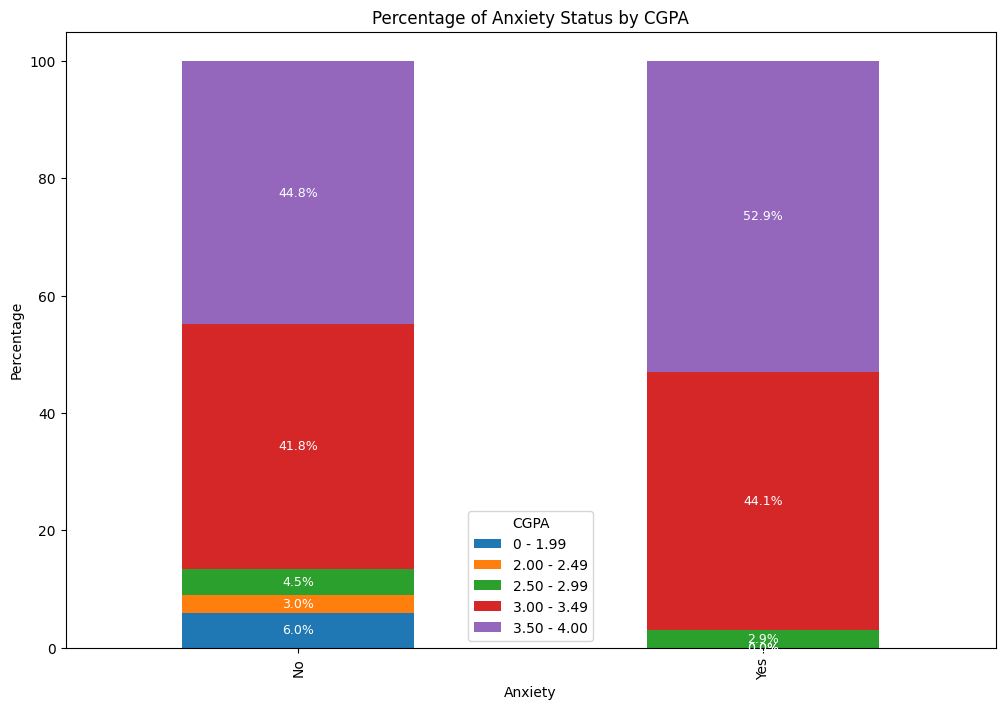

In [170]:
grouped = df.groupby("Anxiety")["CGPA"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True, figsize = (12, 8))


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Anxiety")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Anxiety Status by CGPA')
ax.legend(title="CGPA")

print()

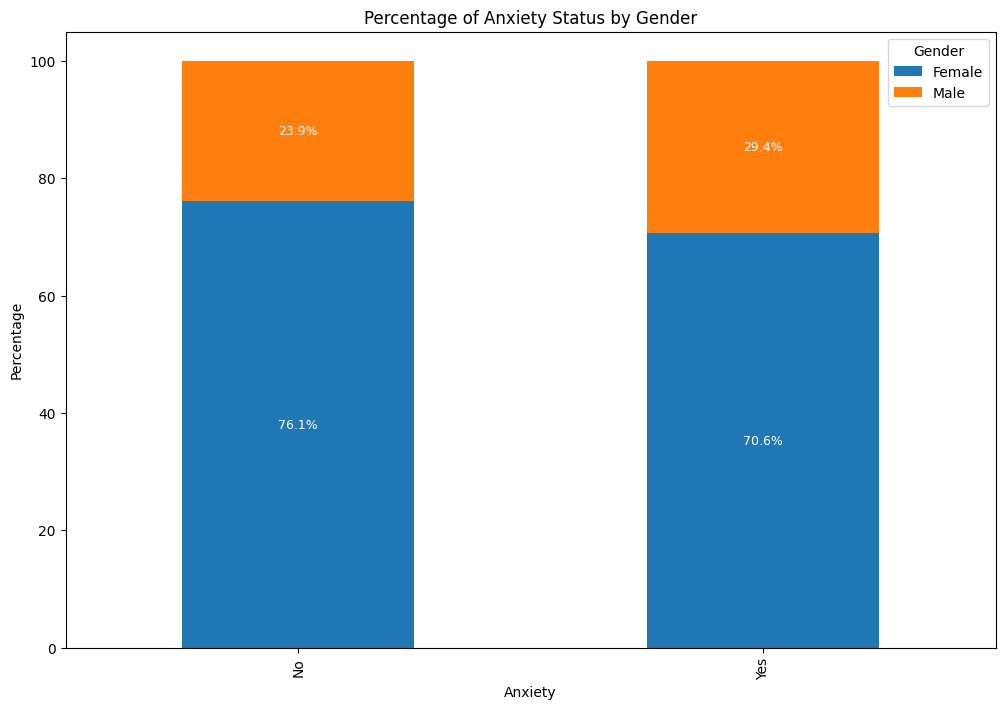

In [171]:
grouped = df.groupby("Anxiety")["Gender"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True, figsize = (12, 8))


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Anxiety")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Anxiety Status by Gender')
ax.legend(title="Gender")

print()

## Panic Attack

In [172]:
df["Panic attack"].value_counts()

Panic attack
No     68
Yes    33
Name: count, dtype: int64

In [173]:
fig = px.pie(df, names = "Panic attack", title = "Panic attack Distribution")
fig.update_layout(legend_title_text = "Panic attack", )
fig.show()

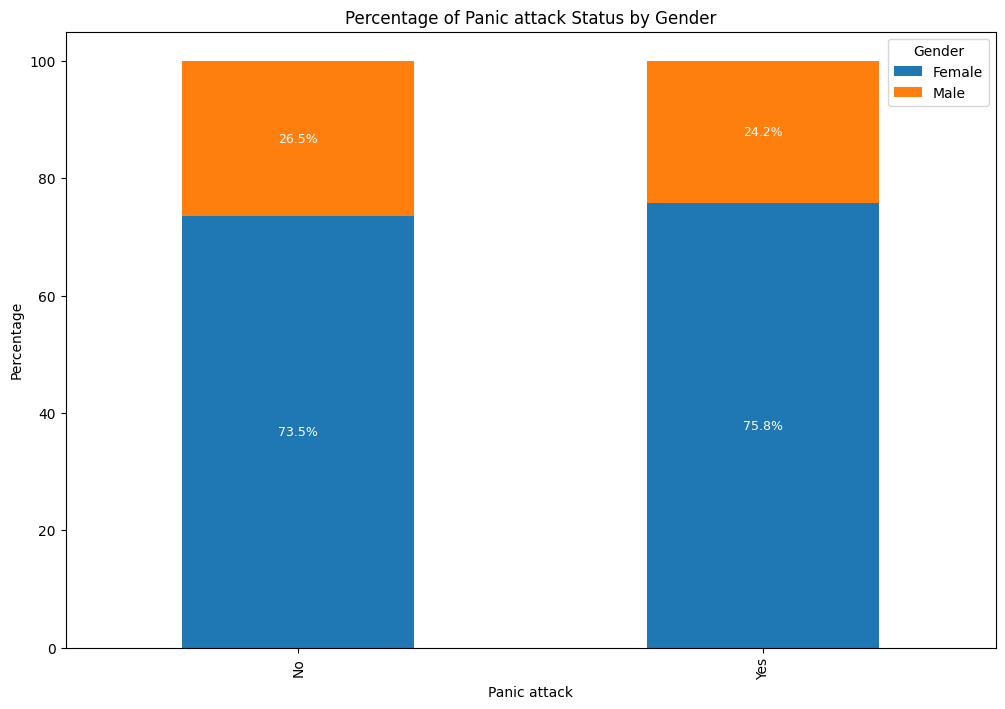

In [174]:
grouped = df.groupby("Panic attack")["Gender"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True, figsize = (12, 8))


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Panic attack")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Panic attack Status by Gender')
ax.legend(title="Gender")

print()

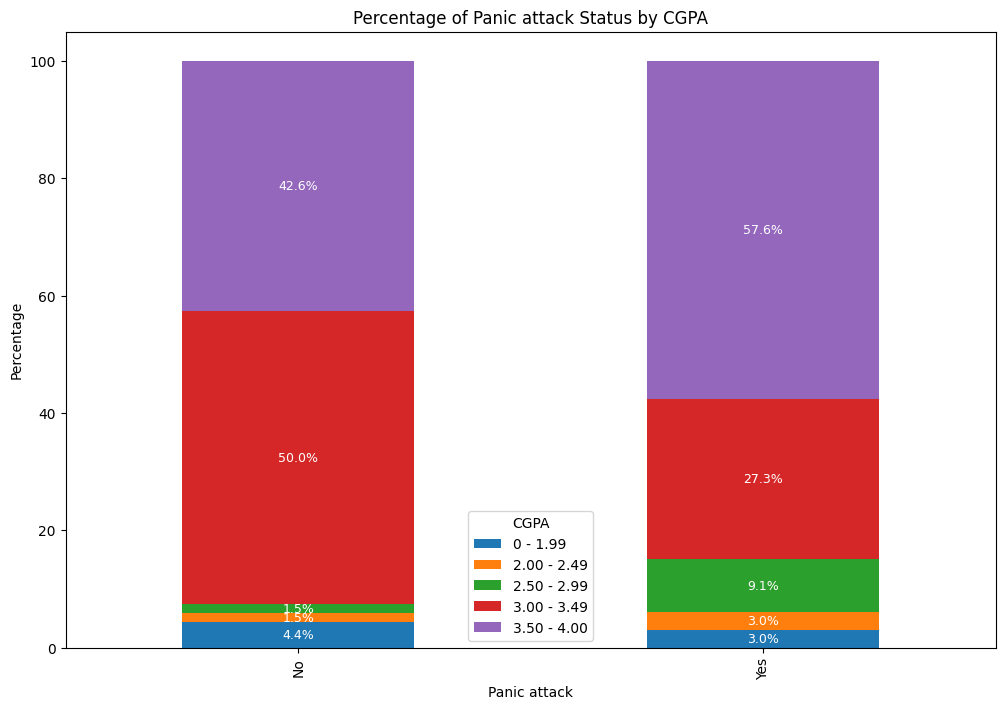

In [175]:
grouped = df.groupby("Panic attack")["CGPA"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True, figsize = (12, 8))


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Panic attack")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Panic attack Status by CGPA')
ax.legend(title="CGPA")

print()

## A New Perspective for Depression, Anxiety, Panic Attack

In [176]:
df_new = df[["Depression", "Anxiety", "Panic attack", "Treatment"]]

In [177]:
df_new.groupby("Treatment")["Depression"].value_counts()

Treatment  Depression
No         No            66
           Yes           29
Yes        Yes            6
Name: count, dtype: int64

In [178]:
df_new.groupby("Treatment")["Anxiety"].value_counts()

Treatment  Anxiety
No         No         64
           Yes        31
Yes        No          3
           Yes         3
Name: count, dtype: int64

In [179]:
df_new.groupby("Treatment")["Panic attack"].value_counts()

Treatment  Panic attack
No         No              66
           Yes             29
Yes        Yes              4
           No               2
Name: count, dtype: int64

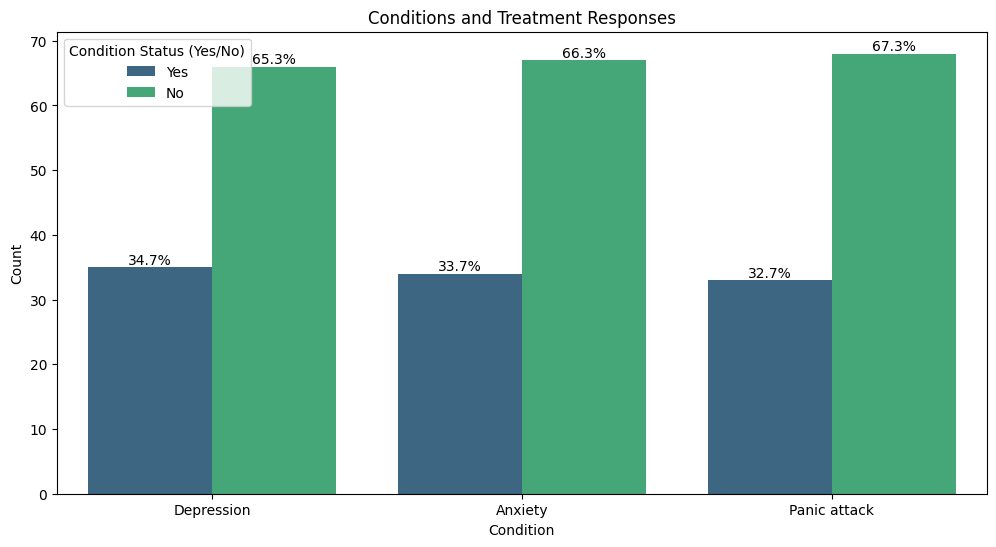

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

df_long = df_new.melt(id_vars='Treatment', var_name='Condition', value_name='Condition_Status')


plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_long, x='Condition', hue='Condition_Status', palette='viridis', dodge=True)
plt.title('Conditions and Treatment Responses')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.legend(title='Condition Status (Yes/No)')


total_counts = df_long.groupby(['Condition', 'Condition_Status']).size().unstack().sum(axis=1)

for p in ax.patches:
    condition = p.get_x() + p.get_width() / 2.0
    height = p.get_height()
    condition_label = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2)].get_text()
    total = total_counts[condition_label]
    percentage = f'{height / total * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

print()

# Final Analysis

In [181]:
def convert_range_to_midpoint(cgpa_range):
    lower, upper = map(float, cgpa_range.split(' - '))
    return (lower + upper) / 2


df['CGPA_Updated'] = df['CGPA'].apply(convert_range_to_midpoint)

In [182]:
plt = px.histogram(df, x='CGPA_Updated', color='Depression', barmode='group', title='CGPA and Depression Distribution')
plt.show()

plt = px.histogram(df, x='CGPA_Updated', color='Anxiety', barmode='group', title='CGPA and Anxiety Distribution')
plt.show()

plt = px.histogram(df, x='CGPA_Updated', color='Panic attack', barmode='group', title='CGPA and Panic Attack Distribution')
plt.show()

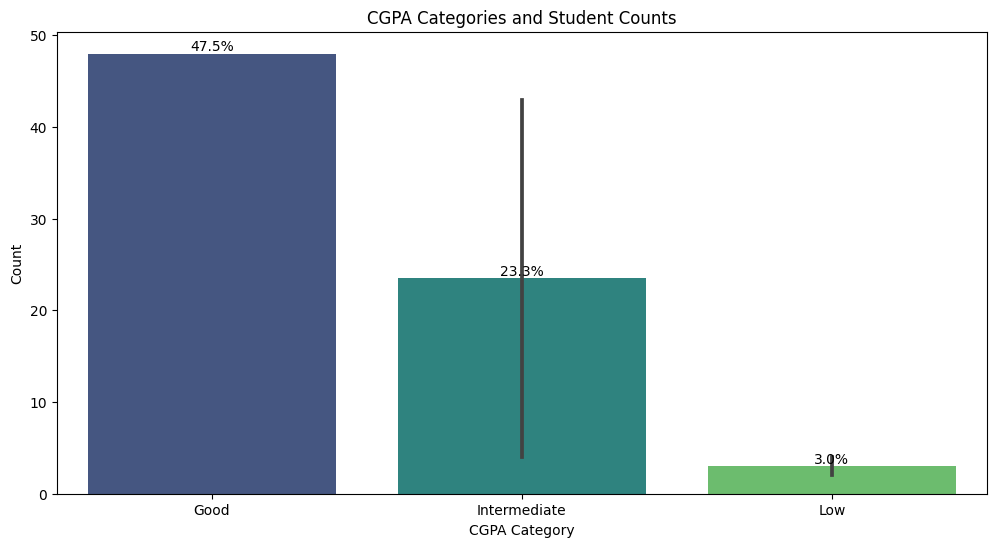

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "CGPA": ["3.50 - 4.00", "3.00 - 3.49", "2.50 - 2.99", "0 - 1.99", "2.00 - 2.49"],
    "Count": [48, 43, 4, 4, 2]
}

df = pd.DataFrame(data)

def convert_range_to_midpoint(cgpa_range):
    lower, upper = map(float, cgpa_range.split(' - '))
    return (lower + upper) / 2

df['CGPA_Updated'] = df['CGPA'].apply(convert_range_to_midpoint)

def classify_cgpa(midpoint):
    if midpoint >= 0 and midpoint <= 2.49:
        return 'Low'
    elif midpoint >= 2.50 and midpoint <= 3.49:
        return 'Intermediate'
    elif midpoint >= 3.50 and midpoint <= 4.00:
        return 'Good'
    else:
        return 'Unknown'

df['CGPA_Category'] = df['CGPA_Updated'].apply(classify_cgpa)

df_long = df.melt(id_vars=['CGPA', 'Count', 'CGPA_Updated', 'CGPA_Category'], var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='CGPA_Category', y='Count', data=df, palette='viridis')
plt.title('CGPA Categories and Student Counts')
plt.xlabel('CGPA Category')
plt.ylabel('Count')

total_counts = df['Count'].sum()

for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total_counts * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()